In [60]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
df = pd.read_csv('/Users/Kevin/Desktop/label.csv')
df

,name of the file,digit label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
1792,1792,9
1793,1793,0
1794,1794,8
1795,1795,9


In [62]:
df.shape[0]

1797

# PART B

In [71]:
%matplotlib inline

images = []
feature_cols = []

for i in range(df.shape[0]):
    path = Image.open('/Users/Kevin/Desktop/Digit/' + str(i) + '.jpg')
    pixels = np.asarray(path).flatten()
    images.append(pixels) 

for i in range(64):
    feature_cols.append("number of pixels " + str(i))
    
image_df = pd.DataFrame(images, columns = feature_cols)

X = image_df[feature_cols]

y = df['digit label']

print(X)
print(y)

      number of pixels 0  number of pixels 1  number of pixels 2  \
0                      0                   2                  88   
1                      0                   0                  11   
2                      0                   0                   5   
3                      6                   0                 108   
4                      0                   6                   0   
...                  ...                 ...                 ...   
1792                   5                   0                  69   
1793                   6                   0                  96   
1794                   5                   0                  22   
1795                   7                   0                  22   
1796                   0                  17                 155   

      number of pixels 3  number of pixels 4  number of pixels 5  \
0                    217                 158                  21   
1                    187                 210   

# PART C

In [72]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

# PART D

In [73]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)

my_RandomForest.fit(X_train, y_train)

y_predict = my_RandomForest.predict(X_test)

RF_Score = accuracy_score(y_test,y_predict)
print(RF_Score)

0.9277777777777778


# RandomForest Accuracy is 92.7%

# PART E

In [109]:
#y_test = np.asarray(y_test)
misc = np.where(y_test != y_predict)[0]
index = []
xSize = X_test.index
for i in range(len(misc)):
    index.append(xSize[misc[i]])
    
print(index)    

[1660, 1611, 123, 1582, 492, 1603, 1628, 1605, 794, 37, 69, 1468, 1573]


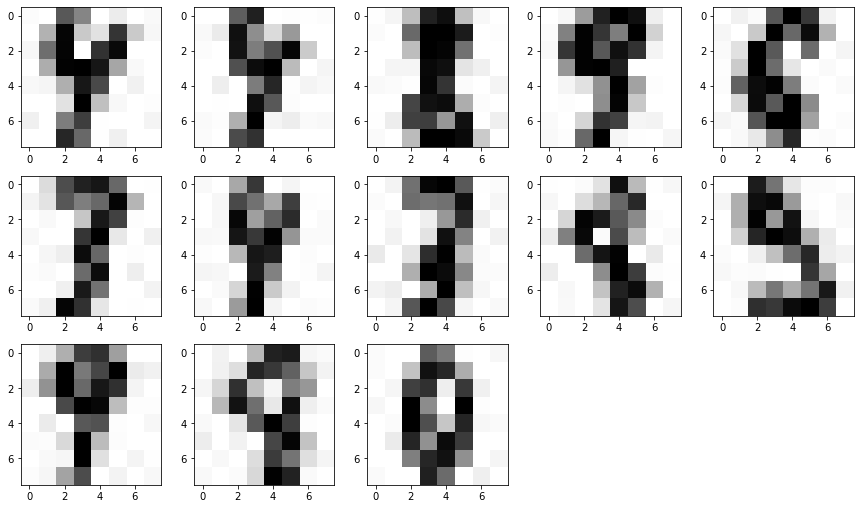

In [137]:

plt.figure(figsize=(15,15))

for i in range(len(index)):
        path = '/Users/Kevin/Desktop/Digit/' + str(index[i]) + '.jpg'
        img = mpimg.imread(path)
        plt.subplot(5,5,i + 1)
        plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest') 
        

plt.show()